In [69]:
import cv2
import numpy as np

# Read image
original_image = cv2.imread(r'E:\vir\env\spectral\mercury_calibrate\A1HLT1a.png')

grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image 
_, binary_image = cv2.threshold(grayscale_image, 10, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty mask to draw the segmented regions
segmentation_mask = np.zeros_like(grayscale_image)

# Loop through the contours and draw them on the mask
for contour in contours:
    cv2.drawContours(segmentation_mask, [contour], -1, (255), thickness=cv2.FILLED)


# Segment the original image using the mask
segmented_image = cv2.bitwise_and(original_image, original_image, mask=segmentation_mask)

# Find the bounding box of the segmented regions
x, y, w, h = cv2.boundingRect(segmentation_mask)

# Crop the segmented image based on the bounding box
cropped_segmented_image = segmented_image[y:y+h*2, x:x+w]

# Display the original image, the segmentation mask, and the segmented image
# cv2.imshow('Original Image', original_image)
cv2.imshow('cropped_segmented_image', cropped_segmented_image)

cv2.imwrite(r'E:\vir\env\spectral\mercury_calibrate\segmentation_mask1.png', cropped_segmented_image)

cv2.waitKey(0)
cv2.destroyAllWindows()
# else:
#     print("Image not loaded successfully.")



In [103]:
# import scipy.misc as misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
original_image = cv2.imread(r'E:\vir\env\spectral\mercury_calibrate\segmentation_mask2.png')
# img = imread(path)
gray_image = cv2.cvtColor(cropped_segmented_image, cv2.COLOR_BGR2GRAY)
mean_value = gray_image.mean(axis=1)
# df2 = pd.DataFrame(data = mean_value)
df2 = mean_value

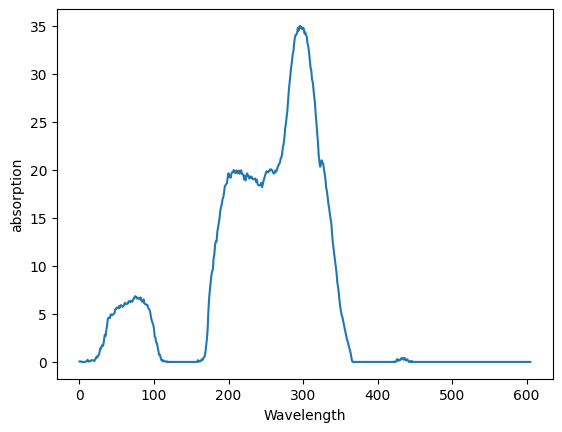

In [104]:
plt.clf()
plt.plot(df2)
plt.xlabel("Wavelength")
plt.ylabel("absorption")
plt.show()

In [105]:
df2

,0
0,0.044693
1,0.044693
2,0.050279
3,0.000000
4,0.000000
...,...
601,0.000000
602,0.000000
603,0.000000
604,0.000000
